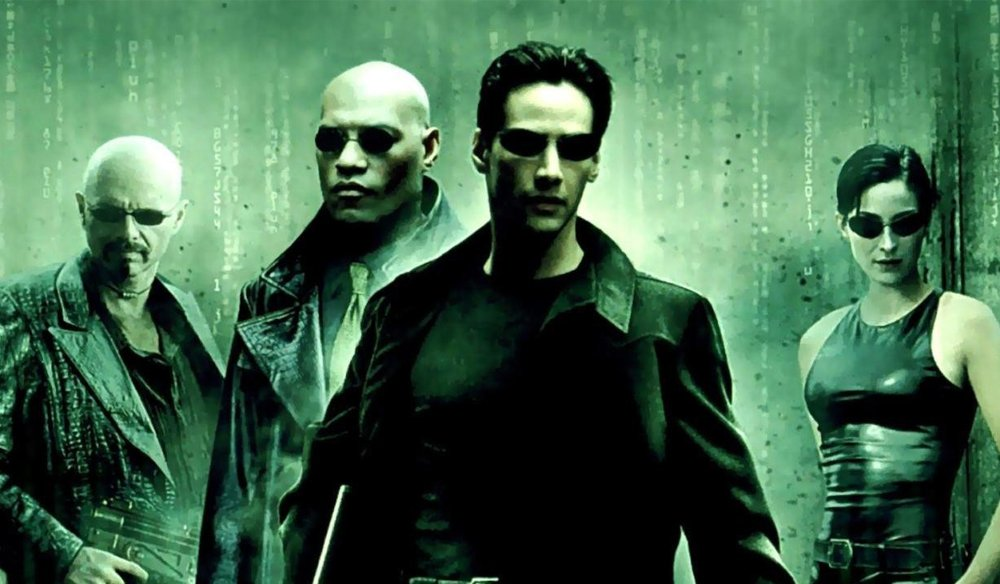

# Project: Investigate a Dataset - TMDB 5000 Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


>The TMDB Movie Dataset has a total of **10866** entries/records and **21** columns and was collected from 
    The Movie Database (TMDb), including user ratings and revenue.

>Certain columns, like **‘cast’** and **‘genres’**, contain multiple values separated by **pipe (|)** characters.

>The final two columns ending with **“_adj”** show the budget and revenue of the associated movie in terms of 2010 dollars,
accounting for inflation over time.




### Question(s) for Analysis

>- Which genres are most popular from year to year?
>- What kinds of properties are associated with movies that have high revenues?

In [1]:
# Load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


#### Observed problems with Dataset
> - Columns with missing values: cast,director,genres,production_companies, homepage, tagline, keywords and overview.
> - Dataset also has budget value of '0' which will be treated as missing values since movie badget cannot be '0'
> - The columns cast, genre and production_companies have their values seperated by '|'

<a id='wrangling'></a>
## Data Wrangling

>- First I will handle the invalid value in the budget column
>- Next I handled missing values
>- Finally I removed the separator '|' and converted the values to an array within the dataframe

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

#### Handling Invalid Budget Values

Some budget values where recorded as 0, which is incorrect and will be considered as a missing value.
There where a total of 5000+ records with invalid records, which makes up about 50% of the dataset, hence droping these values cannot be considered. The method used is to replace the missing values with the mean budget.

In [5]:
#Finding out how many entires have budget = 0

missing_budget = df[df['budget'] == 0]
missing_budget = df.query('budget == 0')
missing_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 30 to 10864
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5696 non-null   int64  
 1   imdb_id               5687 non-null   object 
 2   popularity            5696 non-null   float64
 3   budget                5696 non-null   int64  
 4   revenue               5696 non-null   int64  
 5   original_title        5696 non-null   object 
 6   cast                  5631 non-null   object 
 7   homepage              1229 non-null   object 
 8   director              5656 non-null   object 
 9   tagline               3488 non-null   object 
 10  keywords              4534 non-null   object 
 11  overview              5692 non-null   object 
 12  runtime               5696 non-null   int64  
 13  genres                5674 non-null   object 
 14  production_companies  4802 non-null   object 
 15  release_date       

In [6]:
mean_budget = round(df['budget'].mean())
mean_budget

14625701

In [7]:
df['budget'] = df['budget'].replace(0,mean_budget)

#### Handling missing values for cast, director,genres,production_companies

In [8]:
df['cast'].fillna(" ", inplace=True)

In [9]:
df['director'].fillna(" ", inplace=True)

In [10]:
df['genres'].fillna(" ", inplace=True)

In [11]:
df['production_companies'].fillna(" ", inplace=True)

In [12]:
df['homepage'].fillna(" ", inplace=True)

In [13]:
df['keywords'].fillna(" ", inplace=True)

In [14]:
df['tagline'].fillna(" ", inplace=True)

In [15]:
df['overview'].fillna(" ", inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10866 non-null  object 
 7   homepage              10866 non-null  object 
 8   director              10866 non-null  object 
 9   tagline               10866 non-null  object 
 10  keywords              10866 non-null  object 
 11  overview              10866 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10866 non-null  object 
 14  production_companies  10866 non-null  object 
 15  release_date       

#### Splitting and Converting to array

In [17]:
df['cast'] = df['cast'].str.split('|')

In [18]:
df['genres'] = df['genres'].str.split('|')

In [19]:
df['production_companies'] = df['production_companies'].str.split('|')

In [20]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Which genres are most popular from year to year?

>Here I would like to observe the trend of popular genres through the years. Since the values of this column are categorical, it will be fairly difficult to observe the relationship of this feature with that of others with a tool like the correlation matrix.

> - For this question, I would want to count the number of times a genre appears within a given year.
> - Then I would employ the use of the bar charts to visualize the total count(frequency) against the various genres that appeared during the year.
> - With this I can easily observe the performace of each genre for each year.
> - The one problem posed by this solution is about generating a chart for all 56 years with the time from of 1960 and 2015.
> - Hence, I simplied this processes by generating the charts for every 5years after 1960 which resulted in generating 12 charts which were much easier to compare.
> - Also, to simplfy the counting and plotting process I created a function that takes in the year as a parameter and then counts how many times each genreappears within that year. Once the function is called it will plot a bar chart of the counts of each genre within the year.

In [21]:
def genres(x):
    yearly_df = df[df['release_year'] == x]
    yearly_df = yearly_df['genres'].explode()
    chart = yearly_df.value_counts().plot(kind='bar',title = 'Genre Popularity chart for the year '+ str(x))
    chart.set(xlabel='Genre', ylabel='Frequency')
    return chart

In [22]:
print(df['release_year'].unique())

[2015 2014 1977 2009 2010 1999 2001 2008 2011 2002 1994 2012 2003 1997
 2013 1985 2005 2006 2004 1972 1980 2007 1979 1984 1983 1995 1992 1981
 1996 2000 1982 1998 1989 1991 1988 1987 1968 1974 1975 1962 1964 1971
 1990 1961 1960 1976 1993 1967 1963 1986 1973 1970 1965 1969 1978 1966]


In [23]:
# Convert to List
list1 = df['release_year'].unique().tolist()

In [24]:
list1.sort()
list1

[1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

>Since there are a 56 years present, it will be much easier to plot the graph of every 5 years from 1960-2015;
which will be a total of 12plots

<AxesSubplot:title={'center':'Genre Popularity chart for the year 1960'}, xlabel='Genre', ylabel='Frequency'>

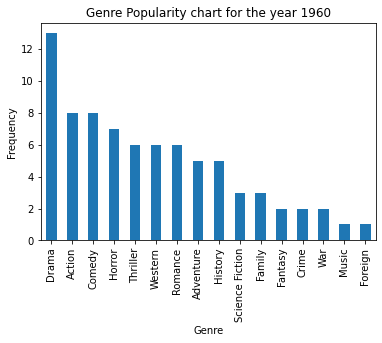

In [25]:
genres(1960)

    The 'Genre Popularity chart for the year 1960' bar chart presents the summary 

<AxesSubplot:title={'center':'Genre Popularity chart for the year 1965'}, xlabel='Genre', ylabel='Frequency'>

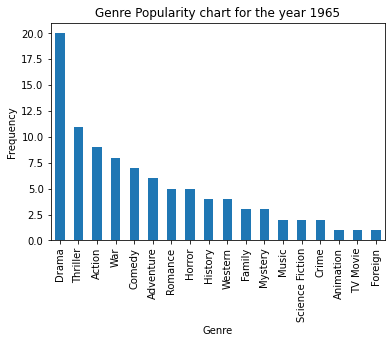

In [26]:
genres(1965)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 1970'}, xlabel='Genre', ylabel='Frequency'>

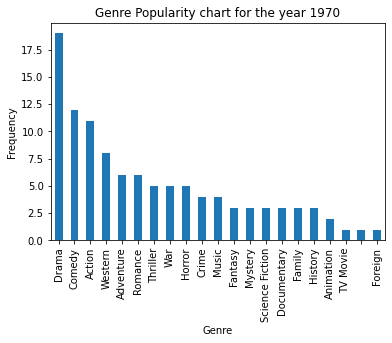

In [27]:
genres(1970)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 1975'}, xlabel='Genre', ylabel='Frequency'>

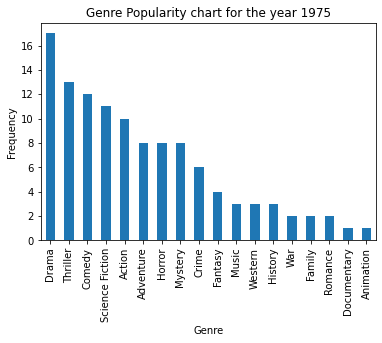

In [28]:
genres(1975)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 1980'}, xlabel='Genre', ylabel='Frequency'>

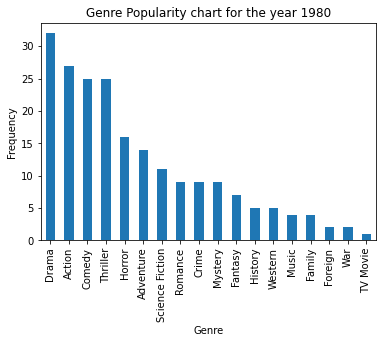

In [29]:
genres(1980)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 1985'}, xlabel='Genre', ylabel='Frequency'>

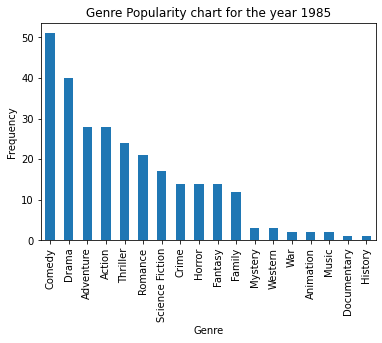

In [30]:
genres(1985)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 1990'}, xlabel='Genre', ylabel='Frequency'>

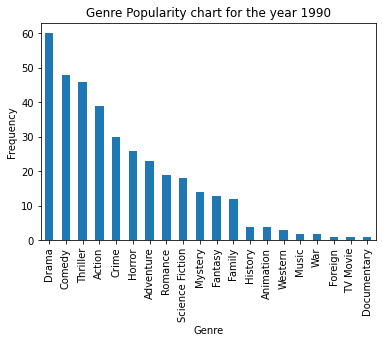

In [31]:
genres(1990)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 1995'}, xlabel='Genre', ylabel='Frequency'>

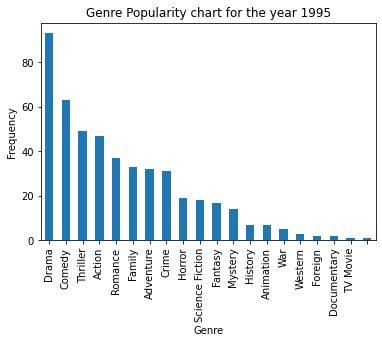

In [32]:
genres(1995)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 2000'}, xlabel='Genre', ylabel='Frequency'>

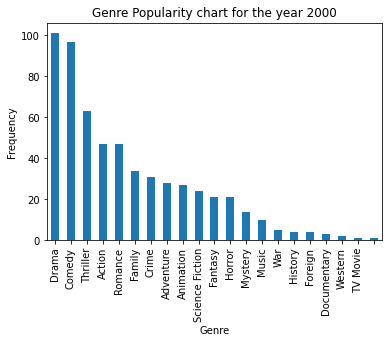

In [33]:
genres(2000)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 2005'}, xlabel='Genre', ylabel='Frequency'>

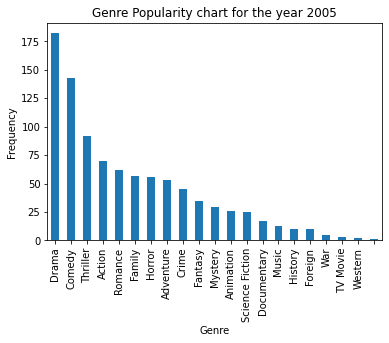

In [34]:
genres(2005)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 2010'}, xlabel='Genre', ylabel='Frequency'>

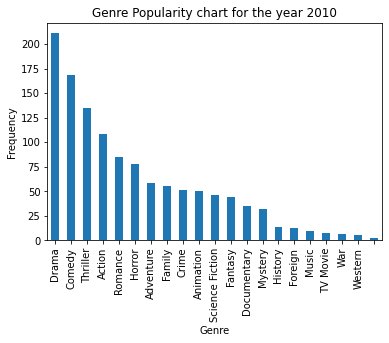

In [35]:
genres(2010)

<AxesSubplot:title={'center':'Genre Popularity chart for the year 2015'}, xlabel='Genre', ylabel='Frequency'>

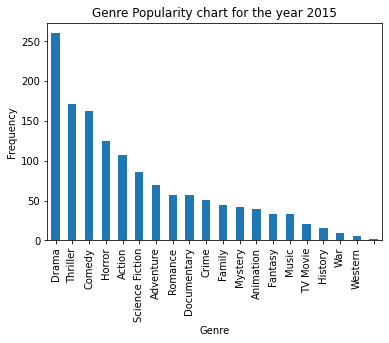

In [36]:
genres(2015)

>From the the **12 charts** presented we can see that the 4 most popular genres are **Drama, Action, Comedy** and **Thriller** with **Drama** as the most popular general for most of the years!

### Research Question 2 : What kinds of properties are associated with movies that have high revenues?

>This dataset contains both sting and numeric columns. We would attempt to observe what kinds of attributes that come with
high revenue movies. For example:

> - **What genre do high revenue movies usually have?**
> - **Which directors are associated with high revenue movies?**
> - **What production comapnies are associated with high revenue movies?**
 
>To answer this subquestion posed, we could first need ot define what we term as a high revenue movie by setting a condition on how much revenue a mvie should generete to be considered as a high revenue movie(high_rev_movies). Here we would set the mean() of the revenue column as the threshold for high revenue movie, meaning if a movie is equal to or above the threshold we can consider it as a high_rev_movie.

>After that can create a separate dataframe to all records of interest - high_rev_movies.

>Now that we have a separate dataframe, we can easily pull aggregated information pertaining to our set high_rev_movies.
> - We can count the number of time each genre occurs in the dataset and plot in with a bar chart to visualize our results.
> - We can count the number of time each director occurs in the dataset and plot in with a bar chart to visualize our results.
> - We can count the number of time each production company in the dataset and plot in with a bar chart to visualize our results.

>Finally we can observe the relationships of the numerical attributes with the help of a correlation matrix. The martic will give an overview of the relationships that exists within the dataset. From here we can know which numerical column affect renuenue the most.

In [37]:
df['revenue'].describe()

count    1.086600e+04
mean     3.982332e+07
std      1.170035e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.400000e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [38]:
round(df['revenue'].mean())

39823320

In [39]:
high_rev_movies = df[df['revenue'] > 39823320].sort_values(by='revenue', ascending=True)
high_rev_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 7326 to 1386
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2170 non-null   int64  
 1   imdb_id               2170 non-null   object 
 2   popularity            2170 non-null   float64
 3   budget                2170 non-null   int64  
 4   revenue               2170 non-null   int64  
 5   original_title        2170 non-null   object 
 6   cast                  2170 non-null   object 
 7   homepage              2170 non-null   object 
 8   director              2170 non-null   object 
 9   tagline               2170 non-null   object 
 10  keywords              2170 non-null   object 
 11  overview              2170 non-null   object 
 12  runtime               2170 non-null   int64  
 13  genres                2170 non-null   object 
 14  production_companies  2170 non-null   object 
 15  release_date      

    Then I created a funtion that will count all the respective genres

In [40]:
def counter(x):
    counting = {}
    for i in x:
        for i in i:
            if i in counting:
                counting[i] += 1
            else:
                counting[i] = 1
    return counting

#### Subquestion 1: What genres do high revneue movies?

In [41]:
high_rev_genres = counter(high_rev_movies['genres'])
high_rev_genres

{'Comedy': 816,
 'Drama': 851,
 'Romance': 352,
 'Horror': 199,
 'Mystery': 174,
 'Thriller': 660,
 'Crime': 354,
 'Music': 71,
 'Science Fiction': 314,
 'Action': 722,
 'History': 73,
 'Adventure': 549,
 'Fantasy': 287,
 'Family': 332,
 'Western': 27,
 'War': 70,
 'TV Movie': 1,
 'Animation': 159,
 'Documentary': 7,
 'Foreign': 1}

    Now we can take a look at the plot of the respective genres present in the high rev movies I defined earlier

<AxesSubplot:title={'center':'Chart of Genres for High Revenue Movies'}, xlabel='Genre', ylabel='Frequency'>

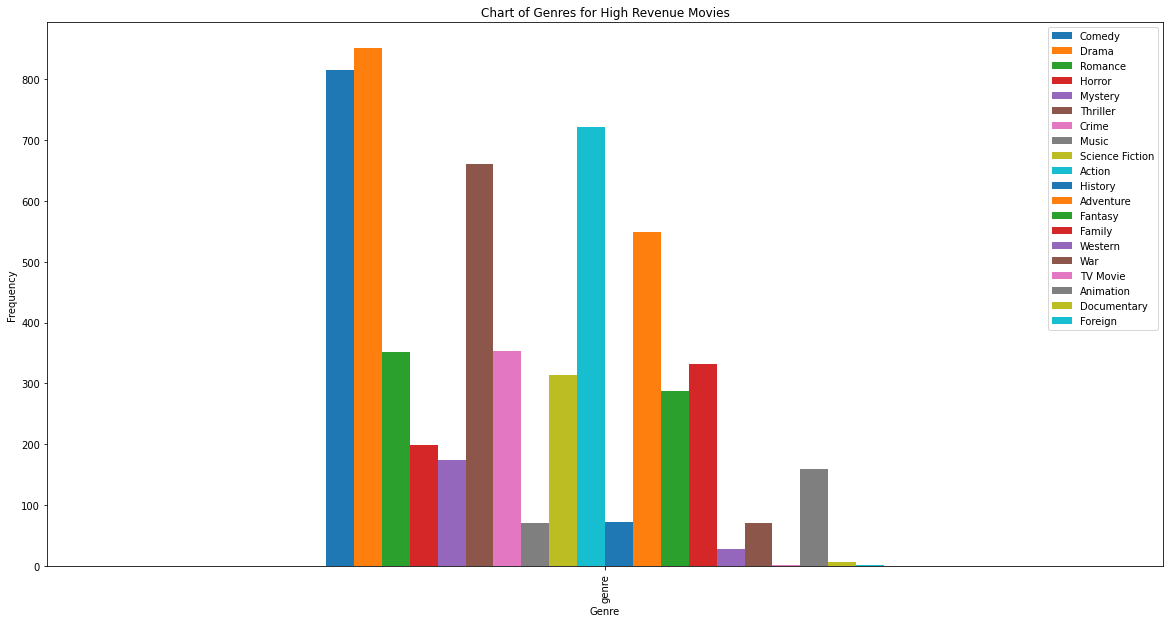

In [42]:
HRG = pd.DataFrame(high_rev_genres,index=['genre'])
HRG.plot(kind='bar', figsize=(20,10),title='Chart of Genres for High Revenue Movies',xlabel='Genre', ylabel='Frequency')

>From the bar chart above we can clearly observe that the High revenue movies usually have **Drama, Comedy, Action, Thriller** and/or **Adventure** as their genres!

#### Subquestion 2: Which directors are associated with high revenue movies?
>Here, since there are so many directors present in this sub dataset, I will **limit** our output to directors who have directed more than 10 movies. This cuts down our records to our **top 9 directors**!

In [43]:
high_rev_dir = high_rev_movies['director'].value_counts()[high_rev_movies['director'].value_counts()>10]
high_rev_dir

Steven Spielberg    25
Clint Eastwood      20
Ridley Scott        17
Ron Howard          16
Robert Zemeckis     14
Tim Burton          14
Michael Bay         11
Joel Schumacher     11
Tony Scott          11
Name: director, dtype: int64

<AxesSubplot:title={'center':'Chart of Top 9 Directors for High Revenue Movies'}, xlabel='Director', ylabel='Frequency'>

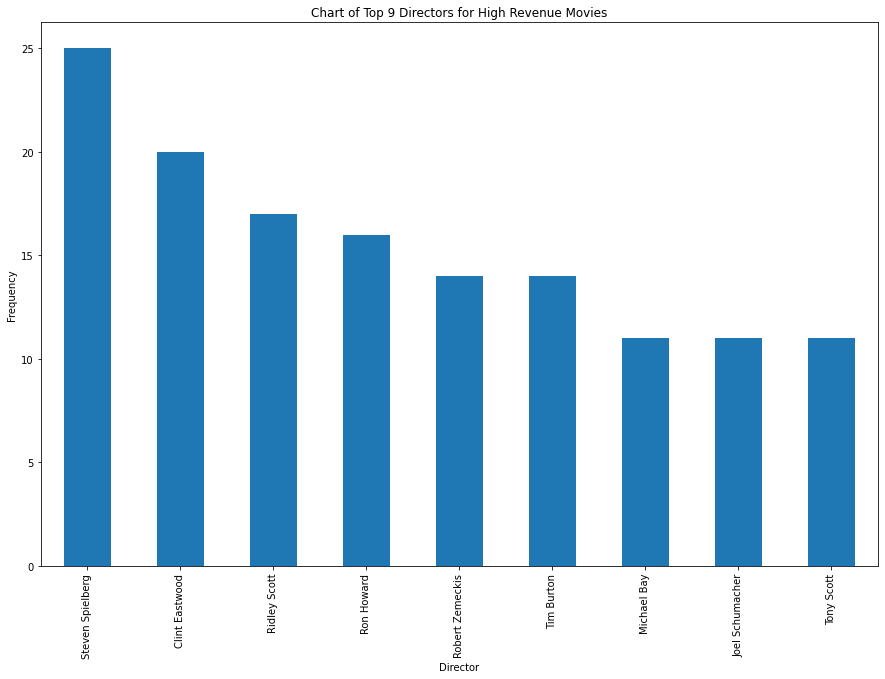

In [44]:
high_rev_dir.plot(kind='bar', figsize=(15,10),title='Chart of Top 9 Directors for High Revenue Movies',xlabel='Director', ylabel='Frequency')

>From the graph we can see the top 9 director in our for high revenue movies with first place going to **"Steven Spielberg"** who directed 25 high revenue movies!

#### Subquestion 3: What production companies are associated with high revenue movies?
>Similar to the process for directors of high revenue movies, we will **limit** our output of production_companies to ones that have produced more than 10 high revenue movies. This leaves us with a our **top 10 production companies**.

In [45]:
high_rev_pc = high_rev_movies['production_companies'].value_counts()[high_rev_movies['production_companies'].value_counts()>10]
high_rev_pc

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Paramount Pictures]                               56
[Universal Pictures]                               30
[Columbia Pictures]                                24
[Warner Bros.]                                     22
[Walt Disney Pictures]                             20
[New Line Cinema]                                  18
[Twentieth Century Fox Film Corporation]           17
[DreamWorks Animation]                             14
[Touchstone Pictures]                              14
[Walt Disney Pictures, Pixar Animation Studios]    13
[20th Century Fox]                                 12
Name: production_companies, dtype: int64

<AxesSubplot:title={'center':'Chart of top 10 Production Companies for High Revenue Movies'}, xlabel='Production Companies', ylabel='Frequency'>

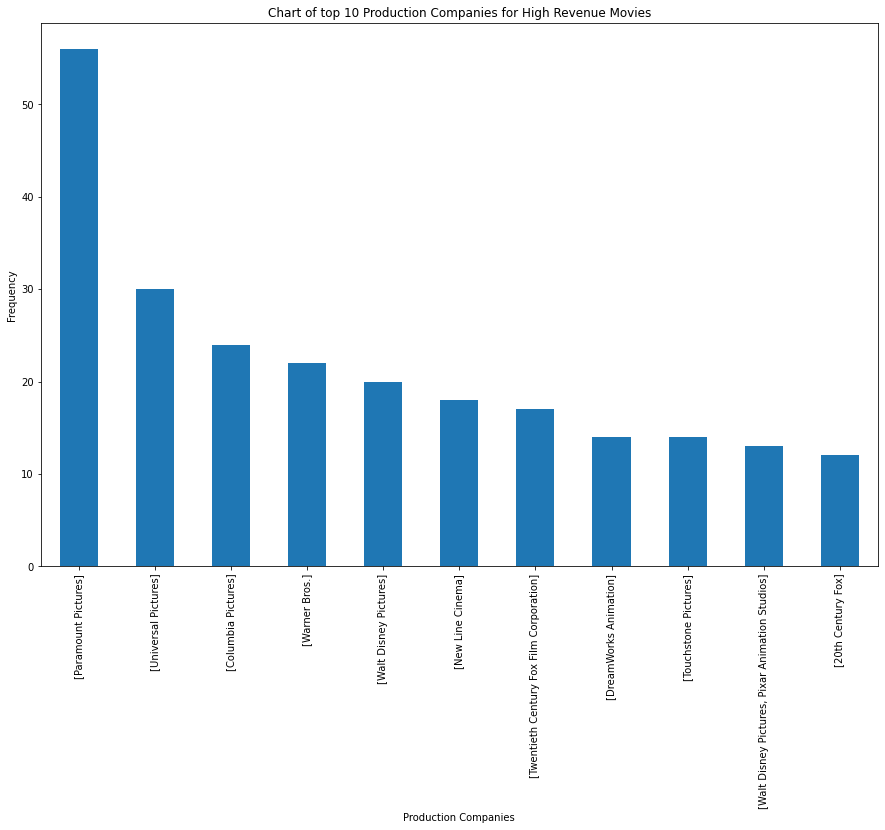

In [46]:
high_rev_pc.plot(kind='bar', figsize=(15,10),title='Chart of top 10 Production Companies for High Revenue Movies',xlabel='Production Companies', ylabel='Frequency')

>From the graph we can observe the performance of the top 11 production comapnies in our for high revenue movies, with first place going to **"Paramount Pictures"** with 56 high revenue movies produced. We can see that **Paramount Pictures** has produced almsot twice the number of high revenue movies as the second place producing company **Universal Pictures**!

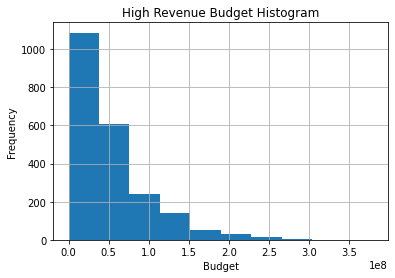

In [47]:
#Now we can take a look at the budget of the high revenue movies
budget = high_rev_movies['budget'].hist()
budget.set_title('High Revenue Budget Histogram');
plt.xlabel('Budget')
plt.ylabel('Frequency');

>The **budget** of high revenue movies is **skewed to the left**

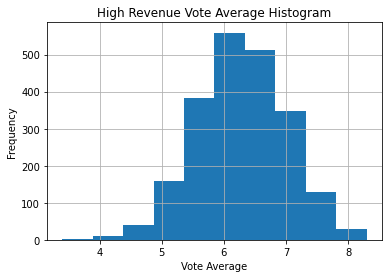

In [48]:
vote_avg = high_rev_movies['vote_average'].hist()
vote_avg.set_title('High Revenue Vote Average Histogram');
plt.xlabel('Vote Average')
plt.ylabel('Frequency');

>The **vote_average** of of high revenue movies has a **normal distribution**

### Confusion Matrix for TMDB Movie Dataset

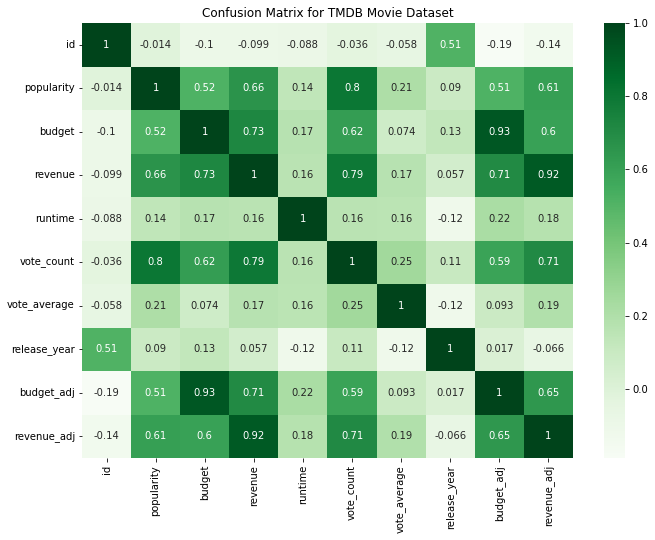

In [49]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Confusion Matrix for TMDB Movie Dataset')
plt.show()

>This correlation matrix shows a relationship of the various numerical columns present in the TMDB Movie Dataset.
>Features are given a number from -1 and 1 to indicate the intensity of the relationship between given features. Also,The darker the shade of green stronger the relationship between the two features.

>From the forest green diagonal, we observe the obvious relationship btween a feature and itself.

>That being said, we can see other strong correlations like that of **budget_adj** and **budget** and **revenue_adj** and **revenue**. These relationships are obviously strong since **revenue_adj** is a derivative of **revenue** and **budget_adj** is a derivative of **budget**. The same principle applies to relationship between **popularity and vote_count**.

>Some meaningful correlation be be observed between **budget and revenue** and **vote_count and revenue** with corr_values of **0.73** and **0.79** respectively.

>From these values and matrix we can easily understand the influence of the **budget** of a movie on the **revenue** generated from the movie. And since the value produce is **postive**, we know that as the budget invested the movie increases so will the revenue generated. Similary as the budget decrease so will the revenue genereted by the movie drop. This relationship between **budget and revenue** can be applied to **vote_count and revenue**. As the **revenue** of a movie increase so will the **number of votes** or vice versa.

>Also, the **rules of transitivity (ie, x=y and y=z then x=z)** we can infer that since budget and revenue have a strong correlation and revenue and vote_count also have a strong correlation, then **budget and vote_count** should have a fairly strong correlation. As shown in the correlation matrix, we can observe the fairly strong **positive** correlation between the **budget** and **vote_count** features with a corr_value of **0.62**. We can now say, that there exists relationship between budget and vote_counts such that then the budget of a movie increases, the **vote_count** of a movie also increases as vice verse.

>Finally, we can observe and infer many other similar relationship between features that are derivates of the **budget, revenue and vote_count** such as **budget_adj and revenue**,  **budget_adj and revenue_adj**, **budget_adj and vote_count**, **budget_adj and popularity**, **revenue_adj and vote_count**, **revenue_adj and popularity**, **popularity and revenue**, **popularity and budget**

### Confusion Matrix for High Revenue Movies Sub dataset

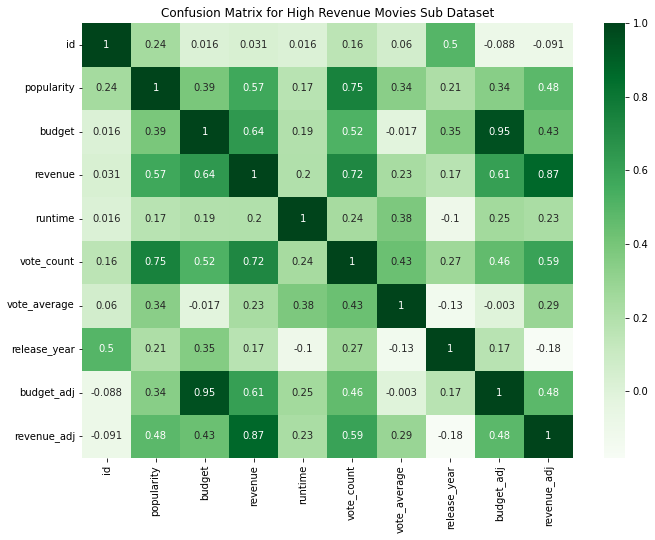

In [50]:
corr = high_rev_movies.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Confusion Matrix for High Revenue Movies Sub Dataset')
plt.show()

<a id='conclusions'></a>
## Conclusions

**Results:** Our data suggests the following:
>1. As shown by the plots in question 1 we can clearly see that **Drama** is the most popular genre for most years. The 4 most popular genres for our plots where **Drama, Comedy, Thriller** and **Action**.

>For the second question we observed that **high revenue movies** are characterized by:

>2. Genre: The top 5 genres are **Drama, Comedy, Action, Thriller and Adventure** with Drama in the lead.
>3. Directors: The top 9 directors are **Steven Speilberg, Clint Eastwood, Ridley Scott, Rod Haward, Robert Zemeckis, Tim Burton, Michael Bay, Joel Schumacher** and **Tony Scott** with Steven Speilberg with the highest number of high revenue movies directed.
>4. Production Companies: The top 10 production companies are Paramount Pictures, Universal Pictures, Columbia Pictures, Warner Bros, New Line Cinema, 20th Century Fox, Dreamworks Animation, Touchstone Pictures** and **Pixar Animation Studios** with Paramount Pictures with the highest number of high revenue movies produced.
>5. Finally by looking at the **correlation matrix for high revenue movies**, we can observe a strong positive relationships between **revenue and vote_count** and **revenue and budget** with corr_values of **0.72** and **0.64**.  As previously stated, positive value indicates that as vote_count and budget of a movie increase so does the revenue as vise versa.
Hence we can conclude that, high revenue movies are characterized by high budget and vote_count.
>6. This relationship can be restated like: **The more money is invested into the movie - budget - the more money that will be gerenated out of it and the more popular that movie will be!**

**Limitations:** Our data has the following limitations:

>1. As shown in the Data Wranglings phase, The TMDB Movie Dataset contained 5000+ records with a budget value equal to **0**. This **invalid data** was present for about **50% of the the entire dataset**.
>2. Though the **mean** value of the budget column was imputed to solve **high missing value problem**, the mean budget value now had the largest number of records. In this case, analysis run with the budget column will not produce very accurate results as compared to having data form the real world.
>3. The budget of a movie is one of the most important/infleuncial features of the dataset as shown in the correlation matrix above. The budget shows a strong positive correlation with the revenue of a movie, hence having 50% of data missing form this column makes analysis of this relationship slightly unclear since the true values of the budget column are originally missing.
>4. The dataset had most of its values as **categorical** which **limited** the use of high level **statistical methods** like the confusion matrix to show the correlation of these features.

## References

https://stackoverflow.com/

https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

https://notebook.community/vikashvverma/machine-learning/mlfoundation/istat/project/investigate-a-dataset-template

https://www.delftstack.com/

https://www.geeksforgeeks.org/pandas-array-function-in-python/

https://towardsdatascience.com/data-grouping-in-python-d64f1203f8d3

https://www.programiz.com/python-programming/methods/list/sort#:~:text=sort

https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/

<ul>
<li><a href="#intro">Back to top</a></li>
</ul>

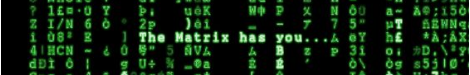